<a href="https://colab.research.google.com/github/ajayvaidyaa/Nashville-Analysis/blob/main/Main_Project_Module_Nashville_4_11_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem:

You just started working for a real estate company and they are looking to make a huge investment into the growing Nashville area. They’ve acquired a dataset about recent sales and want you to build a model to help them accurately find the best value deals when they go to visit next week. There is a concern that houses are going over their asking price and this dataset will help us observe that. Hint: You will have to create the dependent variable to understand whether it is over/under price (you can have multiple categories but remember the limitations of logistic vs decision tree type models).

Part 1:

Use proper data cleansing techniques to ensure that you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data.

Part 2:

Build a linear regression model to accurately predict housing prices and determine what is driving those prices.

Part 3:

Build a decision tree model and compare the results with the results of the previous model.

Part 4:

Build a Random Forest model and compare the results with the results of the previous models.

Part 5:

Build a Gradient Boost model and compare the results with the results of the previous models.

Part 6:

Use multiple benchmarking metrics to compare and contrast the three models. Based on your findings, provide evidence of which model you believe the real estate company should use and what are the key variables to focus on to drive value and how can they get the most value out of the houses they should be targeting.

In [1]:
#https://drive.google.com/file/d/1PvoyfKhywtuPvPt6hY0E3AipkKlmbpP_/view?usp=sharing
import gdown
id='1PvoyfKhywtuPvPt6hY0E3AipkKlmbpP_'
url = 'https://drive.google.com/u/1/uc?id='+ id +'&export=download'
output = "Nashville_housing_data_2013_2016.csv"
gdown.download(url, output,'quiet')

'Nashville_housing_data_2013_2016.csv'

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import matplotlib.image as pltimg
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import time

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#@title Default title text
#for calculating runtime from sklearn run time prediction 
def atomic_benchmark_estimator(estimator, X_test, verbose=False):
    """Measure runtime prediction of each instance."""
    n_instances = X_test.shape[0]
    runtimes = np.zeros(n_instances, dtype=float)
    for i in range(n_instances):
        instance = X_test[[i], :]
        start = time.time()
        estimator.predict(instance)
        runtimes[i] = time.time() - start
    if verbose:
        print(
            "atomic_benchmark runtimes:",
            min(runtimes),
            np.percentile(runtimes, 50),
            max(runtimes),
        )
    return runtimes

In [4]:
nashville=pd.read_csv('Nashville_housing_data_2013_2016.csv')

In [5]:
nashville.head(10)

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Owner Name,Address,City,State,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,No,No,"STINSON, LAURA M.",1802 STEWART PL,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,No,No,"NUNES, JARED R.",2761 ROSEDALE PL,NASHVILLE,TN,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,No,No,"WHITFORD, KAREN",224 PEACHTREE ST,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130.0,\133000\721001.JPG,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,No,No,"HENDERSON, JAMES P. & LYNN P.",316 LUTIE ST,NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,5,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,2013-01-04,93736,20130118-0006110,No,No,"MILLER, JORDAN",2626 FOSTER AVE,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,3130.0,\134000\656001.JPG,25000.0,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0
6,6,6,119 10 0A 104.00,RESIDENTIAL CONDO,104 PRESCOTT PL,NaN,NASHVILLE,2013-01-07,64900,20130109-0002881,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,7,119 13 0 183.00,SINGLE FAMILY,501 MORTON AVE,NaN,NASHVILLE,2013-01-15,44000,20130115-0004888,No,No,"MICKLER, PATRICK L. & LOIS J. & ARNETT, RYAN D.",501 MORTON AVE,NASHVILLE,TN,0.20,URBAN SERVICES DISTRICT,3179.0,\136000\266001.JPG,16000.0,68100.0,84300.0,1216.00000,CRAWL,1932.0,FRAME,D,2.0,1.0,0.0
8,8,8,119 13 0 183.00,SINGLE FAMILY,501 MORTON AVE,NaN,NASHVILLE,2013-01-25,49900,20130128-0008950,No,No,"MICKLER, PATRICK L. & LOIS J. & ARNETT, RYAN D.",501 MORTON AVE,NASHVILLE,TN,0.20,URBAN SERVICES DISTRICT,3179.0,\136000\266001.JPG,16000.0,68100.0,84300.0,1216.00000,CRAWL,1932.0,FRAME,D,2.0,1.0,0.0
9,9,9,119 15 0 158.00,SINGLE FAMILY,113 NEESE DR,NaN,NASHVILLE,2013-01-09,25000,20130111-0003850,No,No,"SONA LAND CO, LLC",113 NEESE DR,NASHVILLE,TN,0.40,URBAN SERVICES DISTRICT,3131.0,\137000\81001.JPG,25000.0,57100.0,88400.0,1152.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0


In [6]:
#part 1 data cleaning
#dropping the unname columns, unmamed0 unmaed 0.1,- useless data, no value
nashville=nashville.iloc[:,2:]

In [7]:
nashville.columns

Index(['Parcel ID', 'Land Use', 'Property Address', 'Suite/ Condo   #',
       'Property City', 'Sale Date', 'Sale Price', 'Legal Reference',
       'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'Owner Name',
       'Address', 'City', 'State', 'Acreage', 'Tax District', 'Neighborhood',
       'image', 'Land Value', 'Building Value', 'Total Value', 'Finished Area',
       'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms',
       'Full Bath', 'Half Bath'],
      dtype='object')

In [8]:
#non significant variables 
nd=['Owner Name','Parcel ID','Legal Reference','Property Address','Suite/ Condo   #','Sale Date','Address','City','State','image']

In [9]:
nashville=nashville.drop(nd,axis=1)
nashville.head()

,Land Use,Property City,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,RESIDENTIAL CONDO,NASHVILLE,132000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SINGLE FAMILY,NASHVILLE,191500,No,No,0.17,URBAN SERVICES DISTRICT,3127.0,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,SINGLE FAMILY,NASHVILLE,202000,No,No,0.11,CITY OF BERRY HILL,9126.0,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,SINGLE FAMILY,NASHVILLE,32000,No,No,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,SINGLE FAMILY,NASHVILLE,102000,No,No,0.34,URBAN SERVICES DISTRICT,3130.0,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


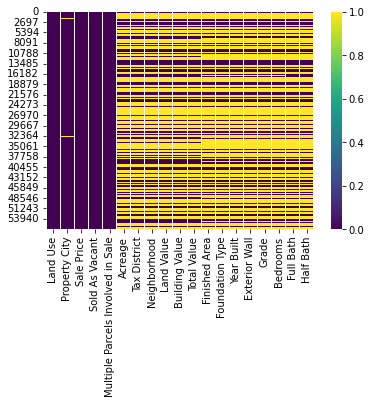

In [10]:
#where missing values
sns.heatmap(nashville.isna(), cmap='viridis')

In [11]:
#drop na in dataset columns na there 
nashville=nashville.dropna()

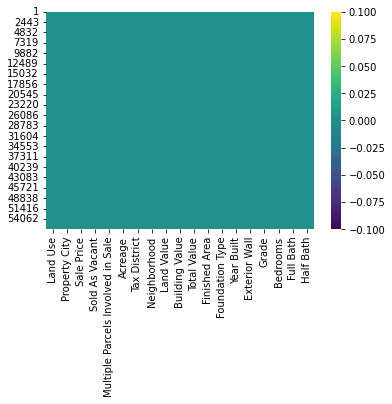

In [12]:
#cleaned dataset
sns.heatmap(nashville.isna(), cmap='viridis')

In [13]:
#number float and text are objects
nashville.dtypes

Land Use                              object
Property City                         object
Sale Price                             int64
Sold As Vacant                        object
Multiple Parcels Involved in Sale     object
Acreage                              float64
Tax District                          object
Neighborhood                         float64
Land Value                           float64
Building Value                       float64
Total Value                          float64
Finished Area                        float64
Foundation Type                       object
Year Built                           float64
Exterior Wall                         object
Grade                                 object
Bedrooms                             float64
Full Bath                            float64
Half Bath                            float64
dtype: object

Part 2:

Build a linear regression model to accurately predict housing prices and determine what is driving those prices.

In [14]:
nashville_dummies=pd.get_dummies(nashville)

In [15]:
y=nashville_dummies['Sale Price']
X=nashville_dummies.drop(['Sale Price'],axis=1)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #0.2 20% of testing, 80%training 

In [17]:
X2=sm.add_constant(x_train)
est=sm.OLS(y_train,X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     636.8
Date:                Thu, 23 Dec 2021   Prob (F-statistic):               0.00
Time:                        04:36:35   Log-Likelihood:            -2.5798e+05
No. Observations:               19208   AIC:                         5.161e+05
Df Residuals:                   19133   BIC:                         5.167e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [18]:
#storring in dictionrary in p values and p values from stats table
pvalues=dict(est2.pvalues)
pvalues 

{'Acreage': 0.1534146299051055,
 'Bedrooms': 0.8543023771057634,
 'Building Value': 8.771553924500183e-46,
 'Exterior Wall_BRICK': 0.0011227030586549956,
 'Exterior Wall_BRICK/FRAME': 0.0018535236849449596,
 'Exterior Wall_CONC BLK': 0.19536898240734563,
 'Exterior Wall_FRAME': 0.0003967255403727061,
 'Exterior Wall_FRAME/STONE': 0.000578776010784662,
 'Exterior Wall_LOG': 0.0013726363571708487,
 'Exterior Wall_METAL': 0.006268661875909399,
 'Exterior Wall_PRECAST CONC': 5.431306096741482e-05,
 'Exterior Wall_STONE': 0.014555254556726951,
 'Exterior Wall_STUCCO': 7.746372536866092e-08,
 'Finished Area': 2.8648144002861144e-13,
 'Foundation Type_CRAWL': 0.0012813741478080699,
 'Foundation Type_FULL BSMT': 0.0018861957812234887,
 'Foundation Type_PIERS': 0.0006754498555460166,
 'Foundation Type_PT BSMT': 0.16569134163992252,
 'Foundation Type_SLAB': 0.00033643591917882745,
 'Foundation Type_TYPICAL': 8.291601605585394e-06,
 'Full Bath': 0.0003641603643651626,
 'Grade_A   ': 0.06507976915

In [19]:
#keys is just feature names 
keys=list(pvalues.keys())

In [20]:
keys

['const',
 'Acreage',
 'Neighborhood',
 'Land Value',
 'Building Value',
 'Total Value',
 'Finished Area',
 'Year Built',
 'Bedrooms',
 'Full Bath',
 'Half Bath',
 'Land Use_APARTMENT: LOW RISE (BUILT SINCE 1960)',
 'Land Use_CHURCH',
 'Land Use_CLUB/UNION HALL/LODGE',
 'Land Use_CONVENIENCE MARKET WITHOUT GAS',
 'Land Use_DAY CARE CENTER',
 'Land Use_DORMITORY/BOARDING HOUSE',
 'Land Use_DUPLEX',
 'Land Use_FOREST',
 'Land Use_GREENBELT',
 'Land Use_GREENBELT/RES\r\nGRRENBELT/RES',
 'Land Use_LIGHT MANUFACTURING',
 'Land Use_MOBILE HOME',
 'Land Use_NON-PROFIT CHARITABLE SERVICE',
 'Land Use_OFFICE BLDG (ONE OR TWO STORIES)',
 'Land Use_ONE STORY GENERAL RETAIL STORE',
 'Land Use_PARSONAGE',
 'Land Use_QUADPLEX',
 'Land Use_RESIDENTIAL COMBO/MISC',
 'Land Use_SINGLE FAMILY',
 'Land Use_SPLIT CLASS',
 'Land Use_STRIP SHOPPING CENTER',
 'Land Use_TERMINAL/DISTRIBUTION WAREHOUSE',
 'Land Use_TRIPLEX',
 'Land Use_VACANT RES LAND',
 'Land Use_VACANT RESIDENTIAL LAND',
 'Land Use_ZERO LOT L

In [21]:
len(keys)

91

In [55]:
#@title Enter a pvalue
pvalue = 0.034 #@param {type:"slider", min:0.01, max:0.05, step:0.001}


In [56]:
#filter out ones that have low pvalue and removing const
selectedfeatures=[key for key in keys if pvalues[key] < pvalue]
selectedfeatures=selectedfeatures[1:]
selectedfeatures

['Neighborhood',
 'Land Value',
 'Building Value',
 'Total Value',
 'Finished Area',
 'Year Built',
 'Full Bath',
 'Half Bath',
 'Land Use_APARTMENT: LOW RISE (BUILT SINCE 1960)',
 'Land Use_CHURCH',
 'Land Use_CLUB/UNION HALL/LODGE',
 'Land Use_GREENBELT',
 'Land Use_ONE STORY GENERAL RETAIL STORE',
 'Land Use_VACANT RES LAND',
 'Land Use_VACANT RESIDENTIAL LAND',
 'Property City_HERMITAGE',
 'Property City_MADISON',
 'Property City_NASHVILLE',
 'Sold As Vacant_No',
 'Multiple Parcels Involved in Sale_Yes',
 'Tax District_CITY OF BELLE MEADE',
 'Tax District_CITY OF GOODLETTSVILLE',
 'Tax District_GENERAL SERVICES DISTRICT',
 'Tax District_URBAN SERVICES DISTRICT',
 'Foundation Type_CRAWL',
 'Foundation Type_FULL BSMT',
 'Foundation Type_PIERS',
 'Foundation Type_SLAB',
 'Foundation Type_TYPICAL',
 'Exterior Wall_BRICK',
 'Exterior Wall_BRICK/FRAME',
 'Exterior Wall_FRAME',
 'Exterior Wall_FRAME/STONE',
 'Exterior Wall_LOG',
 'Exterior Wall_METAL',
 'Exterior Wall_PRECAST CONC',
 'Ext

In [57]:
len(selectedfeatures)

47

Linear Regression part 

In [58]:
xmodel=nashville_dummies[selectedfeatures]
xmodel

,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Full Bath,Half Bath,Land Use_APARTMENT: LOW RISE (BUILT SINCE 1960),Land Use_CHURCH,Land Use_CLUB/UNION HALL/LODGE,Land Use_GREENBELT,Land Use_ONE STORY GENERAL RETAIL STORE,Land Use_VACANT RES LAND,Land Use_VACANT RESIDENTIAL LAND,Property City_HERMITAGE,Property City_MADISON,Property City_NASHVILLE,Sold As Vacant_No,Multiple Parcels Involved in Sale_Yes,Tax District_CITY OF BELLE MEADE,Tax District_CITY OF GOODLETTSVILLE,Tax District_GENERAL SERVICES DISTRICT,Tax District_URBAN SERVICES DISTRICT,Foundation Type_CRAWL,Foundation Type_FULL BSMT,Foundation Type_PIERS,Foundation Type_SLAB,Foundation Type_TYPICAL,Exterior Wall_BRICK,Exterior Wall_BRICK/FRAME,Exterior Wall_FRAME,Exterior Wall_FRAME/STONE,Exterior Wall_LOG,Exterior Wall_METAL,Exterior Wall_PRECAST CONC,Exterior Wall_STONE,Exterior Wall_STUCCO,Grade_AAC,Grade_C,Grade_D,Grade_OFC,Grade_OMB,Grade_TAC,Grade_TCC,Grade_TFC,Grade_X
1,3127.0,32000.0,134400.0,168300.0,1149.00000,1941.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,9126.0,34000.0,157800.0,191800.0,2090.82495,2000.0,2.0,1.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3130.0,25000.0,243700.0,268700.0,2145.60001,1948.0,2.0,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3130.0,25000.0,138100.0,164800.0,1969.00000,1910.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,3130.0,25000.0,86100.0,113300.0,1037.00000,1945.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,6328.0,25000.0,142400.0,167400.0,2421.00000,1996.0,3.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
56607,6328.0,25000.0,159300.0,184300.0,3117.00000,1995.0,3.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
56614,126.0,40000.0,204100.0,256000.0,1637.00000,2004.0,2.0,1.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56615,126.0,40000.0,295900.0,351600.0,2478.00000,2005.0,3.0,1.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
#train and test split
x_train,x_test,y_train,y_test=train_test_split(xmodel,y,test_size=0.2,random_state=42)

In [27]:
reg = LinearRegression().fit(x_train, y_train)
display(reg.score(x_train,y_train))
display(reg.coef_)

0.7104252450057464

array([-4.74505597e+00, -1.67932812e+00, -2.42379209e+00,  2.95334500e+00,
        2.54053507e+01, -1.56204407e+02,  6.43778699e+03,  8.98218671e+03,
        5.78116956e+05,  1.23824320e+05, -9.83728028e+04,  6.99423292e+05,
       -9.40074361e+04, -1.78097171e+05, -1.61136002e+05,  2.79726838e+03,
        1.17082640e+04,  1.55015413e+04,  5.20504820e+03,  2.02044955e+04,
        5.82886158e+03,  1.84478155e+05,  2.12877647e+05, -6.95479913e+04,
        4.65039258e+04,  1.27659995e+04,  2.34202528e+04, -2.20929215e+04,
       -2.10337236e+04,  1.06319870e+05, -2.90754543e+04, -1.01421349e+04,
        2.88501173e+04,  2.51315820e+04,  3.40217613e+04,  5.29967563e+04,
        1.13304985e+05,  1.17433642e+05, -6.42458109e+05,  1.72289932e+04,
        8.95377248e+04,  5.78116956e+05, -1.47566473e+04, -3.20355889e+04,
       -9.40074361e+04,  2.14035563e+06, -8.56727598e+04, -4.44084499e+05,
       -1.56591350e+05, -9.83728028e+04,  4.40643344e+04])

In [28]:
from sklearn.metrics import mean_squared_error
ytrue=y_test
yprediction=reg.predict(x_test)
mean_squared_error(ytrue,yprediction)**0.5
#model off by $142739

142739.1154892758

In [29]:
reg.score(x_test,y_test) #higher the better

0.7560797471312733

In [30]:
lm=atomic_benchmark_estimator(reg,x_test.to_numpy());

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegre

In [31]:
lm.mean()

0.0007066705339579887

Part 3:

Build a decision tree model and compare the results with the results of the previous model.

In [32]:
list(x_train.columns)

['Neighborhood',
 'Land Value',
 'Building Value',
 'Total Value',
 'Finished Area',
 'Year Built',
 'Full Bath',
 'Half Bath',
 'Land Use_APARTMENT: LOW RISE (BUILT SINCE 1960)',
 'Land Use_CHURCH',
 'Land Use_CLUB/UNION HALL/LODGE',
 'Land Use_GREENBELT',
 'Land Use_ONE STORY GENERAL RETAIL STORE',
 'Land Use_VACANT RES LAND',
 'Land Use_VACANT RESIDENTIAL LAND',
 'Property City_ANTIOCH',
 'Property City_BRENTWOOD',
 'Property City_HERMITAGE',
 'Property City_MADISON',
 'Property City_NASHVILLE',
 'Property City_OLD HICKORY',
 'Sold As Vacant_No',
 'Multiple Parcels Involved in Sale_Yes',
 'Tax District_CITY OF BELLE MEADE',
 'Tax District_CITY OF GOODLETTSVILLE',
 'Tax District_GENERAL SERVICES DISTRICT',
 'Tax District_URBAN SERVICES DISTRICT',
 'Foundation Type_CRAWL',
 'Foundation Type_FULL BSMT',
 'Foundation Type_PIERS',
 'Foundation Type_SLAB',
 'Foundation Type_TYPICAL',
 'Exterior Wall_BRICK',
 'Exterior Wall_BRICK/FRAME',
 'Exterior Wall_FRAME',
 'Exterior Wall_FRAME/STONE'

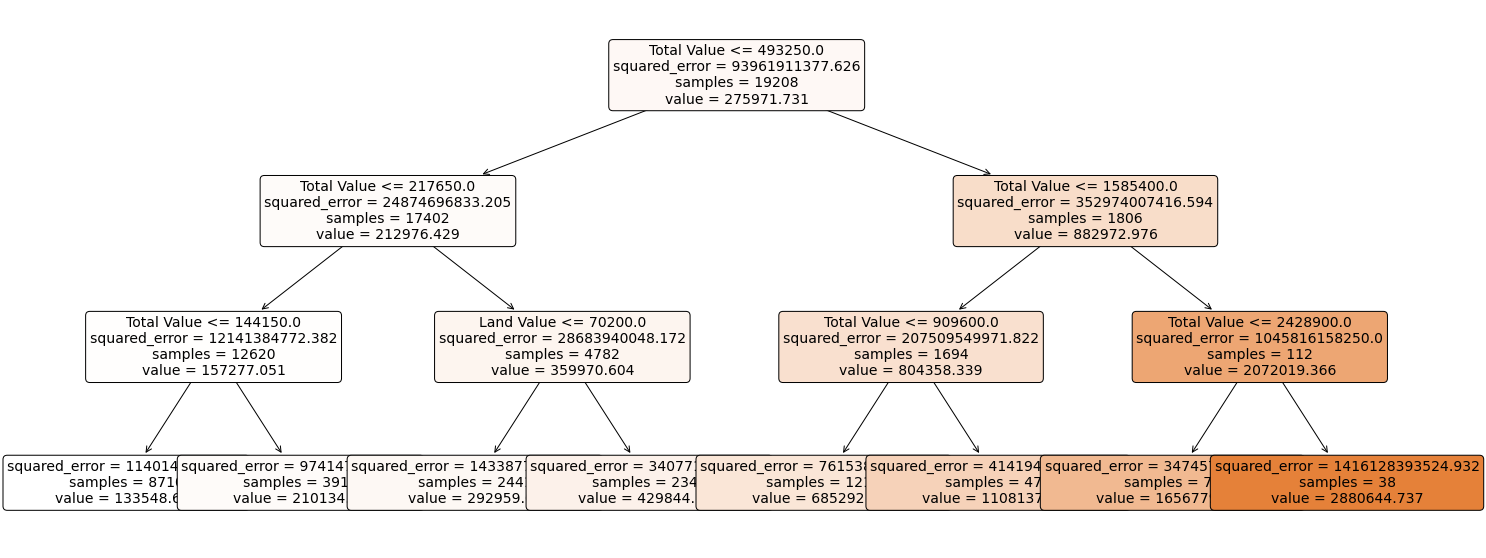

In [33]:
treemodel= DecisionTreeRegressor(max_depth=3)
treemodel.fit(x_train,y_train)
plt.figure(figsize=(25,10))
plot=tree.plot_tree(treemodel,filled=True,feature_names=list(x_train.columns), rounded=True,fontsize=14)

In [34]:
treemodel.predict(x_test)

array([133548.69839265, 133548.69839265, 133548.69839265, ...,
       133548.69839265, 292959.04956985, 210134.83964194])

In [35]:
ytrue=y_test
yprediction=treemodel.predict(x_test)
mean_squared_error(ytrue,yprediction)**0.5

167065.45241842416

In [36]:
treemodel.score(x_test,y_test)

0.6658548504069274

In [37]:
tree_speed=atomic_benchmark_estimator(treemodel,x_test.to_numpy());

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature na

In [38]:
tree_speed.mean()

0.0006352315315375248

Part 4:

Build a Random Forest model and compare the results with the results of the previous models.

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, random_state=0)

In [41]:
regr.predict(x_test)

array([159183.97655442, 133149.84495036, 135342.89478121, ...,
       133149.84495036, 312388.16966979, 211122.80309122])

In [42]:
ytrue=y_test
yprediction=regr.predict(x_test)
mean_squared_error(ytrue,yprediction)**0.5

161829.7243890863

In [43]:
regr.score(x_test,y_test)

0.6864704724160762

In [44]:
rf_speed=atomic_benchmark_estimator(regr,x_test.to_numpy());

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature na

In [45]:
rf_speed.mean()

0.014227028665457223

Part 5:

Build a Gradient Boost model and compare the results with the results of the previous models.

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
gb = GradientBoostingRegressor(max_depth=3,random_state=0)
gb.fit(x_train,y_train)

GradientBoostingRegressor(random_state=0)

In [48]:
gb.predict(x_test)

array([201533.15217431, 126299.38544448, 157565.19920146, ...,
       129496.76362519, 312549.28722704, 220382.16958226])

In [49]:
ytrue=y_test
yprediction=gb.predict(x_test)
mean_squared_error(ytrue,yprediction)**0.5

140449.8190598848

In [50]:
gb.score(x_test,y_test)

0.7638411489766254

Part 6:

Use multiple benchmarking metrics to compare and contrast the three models. Based on your findings, provide evidence of which model you believe the real estate company should use.

Ans= Fit (AIC) and Speed (how fast model computes results)
Accuracy (MSE)- already did it 
for speed  in Python, random.seed from the random package is used.

feedback from other project 
why did you drop acceptedcmp (if customer accepted the offer in the 3rd campaign)? they aren't redundant as they are there to show you how long it took someone to accept. You can take that out if you replace it with a variable for how long did it take someone to accept.- didnt want to depend on inital campaign

not just list variables especially in important ones. You should curb the conversation to key ones that we should focus on. 

the conclusion was focused on the models and not on what drives people to subscribe. The model doesn't help them sell magazines, identifying what drives people to or away from is what does.

In [51]:
tm=atomic_benchmark_estimator(gb,x_test.to_numpy());

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have 

In [52]:
tm

array([0.0015986 , 0.00085759, 0.00135708, ..., 0.00038409, 0.00042129,
       0.00039506])

In [53]:
#avg of tm for gb
tm.mean()

0.0006746337881888446

In [54]:
#run time for decision trees